<a href="https://colab.research.google.com/github/mrezaadi/DQLAB-Note/blob/main/Google%20Colab/DQLAB_Data_Manipulation_wiht_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

**APPEND**

In [3]:
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a", "b", "c", "d", "e", "f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


**CONCAT**

In [4]:
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df1,df2])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df1,df2], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df1,df2], axis=0, keys=['df1', 'df2'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    a  b
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    a  b  b  a
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        a  b
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


**MERGE**

In [5]:
# Untuk index tunggal

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df1, right=df2, how='left', left_on='key', right_on='key') #Berdasarkan key yang sama. right_on dan key_on menunjukkan pada 'key' yang sama.
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df1, right=df2, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df1, right=df2, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df1, right=df2, how='outer', left_on ='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Left:
   key  val1  val2  val3  val4
0  k1   200    30   1.0   6.0
1  k2   500    50   NaN   NaN
2  k3     0   100   2.0   7.0
3  k4   500    20   NaN   NaN
4  k5   100    10   3.0   8.0
Merge - Right:
    key   val1   val2  val3  val4
0   k1  200.0   30.0     1     6
1   k3    0.0  100.0     2     7
2   k5  100.0   10.0     3     8
3   k7    NaN    NaN     4     8
4  k10    NaN    NaN     5    10
Merge - Inner:
   key  val1  val2  val3  val4
0  k1   200    30     1     6
1  k3     0   100     2     7
2  k5   100    10     3     8
Merge - Outer:
    key   val1   val2  val3  val4
0   k1  200.0   30.0   1.0   6.0
1   k2  500.0   50.0   NaN   NaN
2   k3    0.0  100.0   2.0   7.0
3   k4  500.0   20.0   NaN   NaN
4   k5  100.0   10.0   3.0   8.0
5   k7    NaN    NaN   4.0   8.0
6  k10    NaN    NaN   5.0  10.0


In [6]:
#Multi Index

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key', 'val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key', 'val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(), df2.reset_index())
print('Merging dataframe:\n', df_merge)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10
Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


**JOIN**

In [7]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


**PIVOT**

In [ ]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

# Pivoting with single column measurement
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)
data

**PIVOT TABLE**

* Index di dataframe adalah unique identifier untuk setiap row, jadi tidak boleh ada duplikat dan setiap membuat pivot tabel, harus specify index as kolom yang mana dan columns nya memakai kolom yang mana.

* Hal ini dapat diatasi dengan melakukan method .pivot_table() pada dataframe. Metode ini sama seperti melakukan pivot pada tabel tapi juga melakukan groupby dan aggregation (aggfunc) pada level rows sehingga dipastikan tidak ada duplicate index di rows (secara default aggfunc = 'mean').

In [21]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc=sum
pivot_tab_sum = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc=sum)
print('Creating pivot table -- aggfunc sum:\n', pivot_tab_sum)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc sum:
 pelajaran  english  math
kelas                   
A              205   210
B              165   255
Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


**MELT**

Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

In [26]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
# Dengan menspesifikasi keyword argument id_vars yang ditujukan untuk membuat fix kolom yang sebagai id tiap barisnya
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)
# [3.a] Melting dataframe data_pivot dengan value_vars
# Dengan menspesifikasikan keyword argument value_vars yang digunakan untuk menampilkan variasi value apa saja yang perlu dimunculkan di kolom variable. 
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
# Dengan spesifikasikan keyword argument var_name dan value_name yang digunakan untuk menampilkan nama kolom untuk variable dan value
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english', 'math'], var_name='pelajaran', value_name='nliai ') #var_name dan value_name = menentukan nama tabel
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85
Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000
Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0
Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nliai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


**STACK DAN UNSTACK**

Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

In [42]:
#Unstack
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas', 'murid', 'pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

#Quiz
print("\nQuiz")
print(data.unstack())
print(data.unstack([0,1])) #Berdasarkan urutan index nya, artinya index ke-0('kelas') dan index ke-1('murid') dipindahkan ke atas
print(data.unstack([0,2]))
print(data.unstack([1,2]))

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45
Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85

In [29]:
#Stack
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0
Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0
Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
  

**AGREGASI**

Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview.

Groupby memiliki konsep untuk
* Split: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok
* Apply: menerapkan fungsi pada masing-masing kelompok tersebut
* Combine: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe

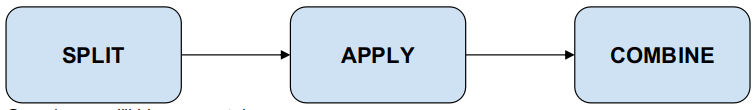

